**목표**

용봉은 승촌보 인근에 위치하고 있는데, 조류 발생 문제가 빈번하게 발생한다.
광주에서 나오는 하수처리장의 방류수가 하천 유량의 70% 정도가 되어 수질이 매우 안 좋으며
녹조도 많이 발생한다.

1. 조류 발생과 관련하여 조류(클로로필) 농도가 높게 나타나는 계절을 찾는다. 주로 여름철?
2. 조류 발생 관련 인자로 총질소, 총인, 온도 등 중에 어느 요인이 가장 중요한지 찾는다.
    현재 국내 정책은 총인의 농도가 가장 중요하다고 여기고 정책을 진행한다.
3. 보 건설에 따른 영향을 보고 싶지만 보 건설은 2011년에 했고, 
    수질 데이터는 2012년부터 공개가 되었어서 보 건설 전후로 설명은 어렵다.
    다만, 2017년부터 보개방을 시작했기에 수문 개방에 따른 수질 효과 분석은 가능하다.
4. 승촌보(용봉) 데이터와 하류에 있는 죽산보(나주) 측정망 자료를 이용하여
    상류와 하류의 비교도 진행한다.

**필수 라이브러리**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

plt.rc('figure', figsize=(10, 6))  # 그림 크기 설정

**matplotlib 한글 설정**

- 운영체제에 따른 한글 지원 설정. 윈도우, 우분투, 구글 코랩 지원.
- 참고: [matplotlib에서 한글 지원하기](https://github.com/codingalzi/datapy/blob/master/matplotlib-korean.md)

In [2]:
import platform

if platform.system() == 'Windows': # 윈도우
    from matplotlib import font_manager, rc
    font_path = "C:/Windows/Fonts/NGULIM.TTF"
    font = font_manager.FontProperties(fname=font_path).get_name()
    rc('font', family=font)
elif platform.system() == 'Linux': # 우분투 또는 구글 코랩
    # !sudo apt-get install -y fonts-nanum*
    # !fc-cache -fv
    
    applyfont = "NanumBarunGothic"
    import matplotlib.font_manager as fm
    if not any(map(lambda ft: ft.name == applyfont, fm.fontManager.ttflist)):
        fm.fontManager.addfont("/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf")
    plt.rc("font", family=applyfont)
    plt.rc("axes", unicode_minus=False)
    

**데이터**

데이터는 연도별로 분리되어 있으며 원본 엑셀 파일은 아래 서버에 저장되어 있다.

In [3]:
base_url = "https://github.com/codingalzi/water-data/raw/master/reservoirs/"

**승촌보 (엑셀) 자료를 데이터프레임으로 불러오기**

- `skiprows=0`: 0번 행 무시. 모든 워크시트 대상.
- `header=1`: 1번 행을 header로 지정, 즉 열 인덱스로 사용.
- `sheet_name=None`: 모든 워크시트 가져오기. 워크시트별로 하나의 df 생성. 반환값은 사전.
- `na_values='ND'`: ND(No Data/Not Determinded) 또한 결측치로 처리. 용조산소 열에 포함되어 있음.
- `index_col=0`: 측정일을 행 인덱스로 사용
- `parse_dates=True`: 행 인덱스로 사용되는 날짜 대상 파싱 실행

주의: 아래 모듈을 먼저 설치해야 할 수도 있다.

```python
!pip install openpyxl
```

In [4]:
scb_yearly = pd.read_excel(base_url+"Seungchonbo.xlsx", 
                            skiprows=0, 
                            header=1, 
                            sheet_name=None,
                            na_values='ND',
                            index_col=0, 
                            parse_dates=True)

- 2012년부터 2022년까지의 데이터가 각각의 워크시트(worksheet)로 존재.
- 따라서 년도를 키로 갖는 사전 자료형으로 불러옴.
- 키값은 각각의 워크시트를 담은 데이터프레임.

In [5]:
type(scb_yearly)

dict

In [6]:
scb_yearly.keys()

dict_keys(['2012년', '2013년', '2014년', '2015년', '2016년', '2017년', '2018년', '2019년', '2020년', '2021년', '2022년'])

**연도별 데이터 수**

- 2012년과 2022년 데이터 수는 크지 않음.


In [35]:
for year in scb_yearly:
    print(year, len(scb_yearly[year]))

2012년 4343
2013년 8750
2014년 8760
2015년 8739
2016년 8784
2017년 8730
2018년 8758
2019년 8760
2020년 8784
2021년 8760
2022년 3432


In [ ]:
for year in scb_yearly:
    print(year, len(scb_yearly[year]))

2012년 4343
2013년 8750
2014년 8760
2015년 8739
2016년 8784
2017년 8730
2018년 8758
2019년 8760
2020년 8784
2021년 8760
2022년 3432


**연도별 결측치 수**

In [55]:
for year in scb_yearly:
    print(year, scb_yearly[year].isna().sum())

2012년 측정소명              0
수온 ℃           2125
수소이온농도         2125
전기전도도 μS/cm    2127
용존산소 mg/L      2125
총유기탄소 mg/L     2221
총질소 mg/L       4343
총인 mg/L        4343
클로로필-a mg/㎥    2073
dtype: int64
2013년 측정소명              0
수온 ℃            698
수소이온농도          698
전기전도도 μS/cm     700
용존산소 mg/L       815
총유기탄소 mg/L      708
총질소 mg/L       2757
총인 mg/L        2702
클로로필-a mg/㎥    1641
dtype: int64
2014년 측정소명              0
수온 ℃            496
수소이온농도          496
전기전도도 μS/cm     513
용존산소 mg/L       581
총유기탄소 mg/L     2934
총질소 mg/L        602
총인 mg/L         563
클로로필-a mg/㎥     618
dtype: int64
2015년 측정소명             0
수온 ℃           361
수소이온농도         358
전기전도도 μS/cm    362
용존산소 mg/L      632
총유기탄소 mg/L     771
총질소 mg/L       516
총인 mg/L        615
클로로필-a mg/㎥    323
dtype: int64
2016년 측정소명              0
수온 ℃            616
수소이온농도          617
전기전도도 μS/cm     622
용존산소 mg/L       886
총유기탄소 mg/L     1150
총질소 mg/L        787
총인 mg/L         880
클로로필-a mg/㎥     598
dtype: int64
2017년 측정소명    

2015년 데이터가 평균적으로 가장 적은 결측치를 포함한다.
2022년 데이터는 데이터가 적음.

In [57]:
for year in scb_yearly:
    print(year, round(scb_yearly[year].isna().sum().mean()))

2012년 2387
2013년 1191
2014년 756
2015년 438
2016년 684
2017년 1507
2018년 6090
2019년 3359
2020년 2211
2021년 1373
2022년 304


In [58]:
scb_yearly['2015년'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8739 entries, 2015-01-01 00:00:00 to 2015-12-31 23:00:00
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   측정소명         8739 non-null   object 
 1   수온 ℃         8378 non-null   float64
 2   수소이온농도       8381 non-null   float64
 3   전기전도도 μS/cm  8377 non-null   float64
 4   용존산소 mg/L    8107 non-null   float64
 5   총유기탄소 mg/L   7968 non-null   float64
 6   총질소 mg/L     8223 non-null   float64
 7   총인 mg/L      8124 non-null   float64
 8   클로로필-a mg/㎥  8416 non-null   float64
dtypes: float64(8), object(1)
memory usage: 682.7+ KB


**2015년 조류(클로로필 A) 데이터**

In [60]:
scb2015_CHLA = scb_yearly['2015년'].iloc[:, [-1]].copy()
scb2015_CHLA

,클로로필-a mg/㎥
측정일/월,
2015-01-01 00:00:00,3.9
2015-01-01 01:00:00,3.9
2015-01-01 02:00:00,3.7
2015-01-01 03:00:00,3.7
2015-01-01 04:00:00,3.8
...,...
2015-12-31 19:00:00,9.8
2015-12-31 20:00:00,9.4
2015-12-31 21:00:00,9.6


- 2015년 조류(클로로필 A) 결측치 제거

In [66]:
scb2015_CHLA_wo_NA = scb2015_CHLA.dropna()

* 조류 변화 선그래프

<AxesSubplot:xlabel='측정일/월'>

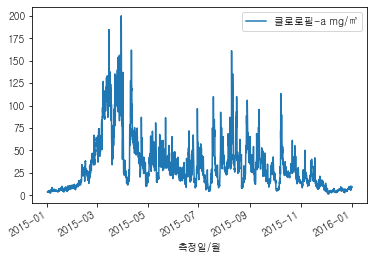

In [67]:
scb2015_CHLA_wo_NA.plot()

- 그래프에 의해 3, 4월 사이가 가장 심했던 것으로 보임.
- 8월도 강해 보임.
- 월별 평균을 알아보는 것도 좋을듯함.
- 가장 심했던 날은 2915년 3월 30일

In [68]:
scb2015_CHLA_wo_NA.idxmax()

클로로필-a mg/㎥   2015-03-30 10:00:00
dtype: datetime64[ns]

실제로 3월 30일 전후로 조류가 가장 심함.

In [69]:
scb2015_CHLA_wo_NA.sort_values('클로로필-a mg/㎥', ascending=False).head()

,클로로필-a mg/㎥
측정일/월,
2015-03-30 10:00:00,199.8
2015-03-30 12:00:00,190.5
2015-03-30 09:00:00,185.2
2015-03-15 16:00:00,184.5
2015-03-30 13:00:00,168.6


## 연도별 조류 최고점

In [17]:
for year in scb_yearly:
    scb_CHLA_year = scb_yearly[year].iloc[:, [-1]].copy()
    scb_CHLA_year_wo_NA = scb_CHLA_year.dropna()
    print(scb_CHLA_year_wo_NA.idxmax())

클로로필-a mg/㎥   2012-10-02 15:00:00
dtype: datetime64[ns]
클로로필-a mg/㎥   2013-05-07 14:00:00
dtype: datetime64[ns]
클로로필-a mg/㎥   2014-04-08 14:00:00
dtype: datetime64[ns]
클로로필-a mg/㎥   2015-03-30 10:00:00
dtype: datetime64[ns]
클로로필-a mg/㎥   2016-08-06 14:00:00
dtype: datetime64[ns]
클로로필-a mg/㎥   2017-07-31 13:00:00
dtype: datetime64[ns]
클로로필-a mg/㎥   2018-01-31 19:00:00
dtype: datetime64[ns]
클로로필-a mg/㎥   2019-08-04 22:00:00
dtype: datetime64[ns]
클로로필-a mg/㎥   2020-03-16 15:00:00
dtype: datetime64[ns]
클로로필-a mg/㎥   2021-04-19 18:00:00
dtype: datetime64[ns]
클로로필-a mg/㎥   2022-04-04 18:00:00
dtype: datetime64[ns]


연도별로 조류 최고점 시기가 다른 이유를 찾아야 함.

- 첫째, 결측치 수와 연관되었을 수 있음.

## 연도별 클로로필-a 결측치 수

In [18]:
for year in scb_yearly:
    scb_CHLA_year = scb_yearly[year].iloc[:, [-1]].copy()
    print(f"{year} 전체 데이터 수: {len(scb_CHLA_year)}")
    print(f"{year} 결측치 데이터 수: {scb_CHLA_year.isna().sum()}")

2012년 전체 데이터 수: 4343
2012년 결측치 데이터 수: 클로로필-a mg/㎥    2073
dtype: int64
2013년 전체 데이터 수: 8750
2013년 결측치 데이터 수: 클로로필-a mg/㎥    1641
dtype: int64
2014년 전체 데이터 수: 8760
2014년 결측치 데이터 수: 클로로필-a mg/㎥    618
dtype: int64
2015년 전체 데이터 수: 8739
2015년 결측치 데이터 수: 클로로필-a mg/㎥    323
dtype: int64
2016년 전체 데이터 수: 8784
2016년 결측치 데이터 수: 클로로필-a mg/㎥    598
dtype: int64
2017년 전체 데이터 수: 8730
2017년 결측치 데이터 수: 클로로필-a mg/㎥    1545
dtype: int64
2018년 전체 데이터 수: 8758
2018년 결측치 데이터 수: 클로로필-a mg/㎥    6720
dtype: int64
2019년 전체 데이터 수: 8760
2019년 결측치 데이터 수: 클로로필-a mg/㎥    3517
dtype: int64
2020년 전체 데이터 수: 8784
2020년 결측치 데이터 수: 클로로필-a mg/㎥    2930
dtype: int64
2021년 전체 데이터 수: 8760
2021년 결측치 데이터 수: 클로로필-a mg/㎥    1319
dtype: int64
2022년 전체 데이터 수: 3432
2022년 결측치 데이터 수: 클로로필-a mg/㎥    170
dtype: int64


## 조류 발생 관련 인자

결측치가 가장 적은 2015년 자료를 이용하여 조류 발생에 가장 큰 영향을 주는 요소를 확인한다.

In [71]:
scb2015 = scb_yearly['2015년'].copy()
scb2015

,측정소명,수온 ℃,수소이온농도,전기전도도 μS/cm,용존산소 mg/L,총유기탄소 mg/L,총질소 mg/L,총인 mg/L,클로로필-a mg/㎥
측정일/월,,,,,,,,,
2015-01-01 00:00:00,용봉,6.3,7.0,410.0,9.2,2.5,5.607,0.057,3.9
2015-01-01 01:00:00,용봉,6.2,7.0,410.0,9.2,2.5,5.596,0.056,3.9
2015-01-01 02:00:00,용봉,6.1,7.0,409.0,9.2,2.4,5.485,0.053,3.7
2015-01-01 03:00:00,용봉,6.1,7.0,410.0,9.2,2.4,5.487,0.052,3.7
2015-01-01 04:00:00,용봉,6.0,7.0,412.0,9.3,2.4,5.625,0.052,3.8
...,...,...,...,...,...,...,...,...,...
2015-12-31 19:00:00,용봉,7.8,6.9,399.0,9.0,3.2,6.088,0.062,9.8
2015-12-31 20:00:00,용봉,7.7,6.9,401.0,9.0,3.3,6.052,0.056,9.4
2015-12-31 21:00:00,용봉,7.7,6.9,401.0,9.0,3.4,6.152,0.053,9.6


총 8739개의 샘플 중에서 평균 438개의 샘플이 결측치를 갖는다.

In [72]:
scb2015.isna().sum().mean()

437.55555555555554

결측치를 하나라도 갖고 있는 행은 모두 제거한다.

In [73]:
scb2015_wo_NA = scb2015.dropna()
scb2015_wo_NA

,측정소명,수온 ℃,수소이온농도,전기전도도 μS/cm,용존산소 mg/L,총유기탄소 mg/L,총질소 mg/L,총인 mg/L,클로로필-a mg/㎥
측정일/월,,,,,,,,,
2015-01-01 00:00:00,용봉,6.3,7.0,410.0,9.2,2.5,5.607,0.057,3.9
2015-01-01 01:00:00,용봉,6.2,7.0,410.0,9.2,2.5,5.596,0.056,3.9
2015-01-01 02:00:00,용봉,6.1,7.0,409.0,9.2,2.4,5.485,0.053,3.7
2015-01-01 03:00:00,용봉,6.1,7.0,410.0,9.2,2.4,5.487,0.052,3.7
2015-01-01 04:00:00,용봉,6.0,7.0,412.0,9.3,2.4,5.625,0.052,3.8
...,...,...,...,...,...,...,...,...,...
2015-12-31 19:00:00,용봉,7.8,6.9,399.0,9.0,3.2,6.088,0.062,9.8
2015-12-31 20:00:00,용봉,7.7,6.9,401.0,9.0,3.3,6.052,0.056,9.4
2015-12-31 21:00:00,용봉,7.7,6.9,401.0,9.0,3.4,6.152,0.053,9.6


In [74]:
scb2015_wo_NA.dtypes

측정소명            object
수온 ℃           float64
수소이온농도         float64
전기전도도 μS/cm    float64
용존산소 mg/L      float64
총유기탄소 mg/L     float64
총질소 mg/L       float64
총인 mg/L        float64
클로로필-a mg/㎥    float64
dtype: object

결측치가 없는 것을 확인한다.

In [77]:
scb2015_wo_NA.isna().sum()

측정소명           0
수온 ℃           0
수소이온농도         0
전기전도도 μS/cm    0
용존산소 mg/L      0
총유기탄소 mg/L     0
총질소 mg/L       0
총인 mg/L        0
클로로필-a mg/㎥    0
dtype: int64

타깃 데이터셋으로 '클로로필-a mg/㎥' 열을 사용한다.

In [78]:
targets_scb2015 = scb2015_wo_NA['클로로필-a mg/㎥'].astype('f4')

입력 데이터셋으로 '클로로필-a mg/㎥' 열과 '측정소명' 열을 제외한 나머지를 사용한다.

In [80]:
inputs_scb2015 = scb2015_wo_NA.iloc[:, 1:-1].astype('f4')
inputs_scb2015

,수온 ℃,수소이온농도,전기전도도 μS/cm,용존산소 mg/L,총유기탄소 mg/L,총질소 mg/L,총인 mg/L
측정일/월,,,,,,,
2015-01-01 00:00:00,6.3,7.0,410.0,9.2,2.5,5.607,0.057
2015-01-01 01:00:00,6.2,7.0,410.0,9.2,2.5,5.596,0.056
2015-01-01 02:00:00,6.1,7.0,409.0,9.2,2.4,5.485,0.053
2015-01-01 03:00:00,6.1,7.0,410.0,9.2,2.4,5.487,0.052
2015-01-01 04:00:00,6.0,7.0,412.0,9.3,2.4,5.625,0.052
...,...,...,...,...,...,...,...
2015-12-31 19:00:00,7.8,6.9,399.0,9.0,3.2,6.088,0.062
2015-12-31 20:00:00,7.7,6.9,401.0,9.0,3.3,6.052,0.056
2015-12-31 21:00:00,7.7,6.9,401.0,9.0,3.4,6.152,0.053


### 랜덤 포레스트 활용

In [81]:
from sklearn.ensemble import RandomForestRegressor

rnd_reg = RandomForestRegressor(n_estimators=500, max_leaf_nodes=16,
                                 n_jobs=-1, random_state=42)

In [82]:
rnd_reg.fit(inputs_scb2015, targets_scb2015)

RandomForestRegressor(max_leaf_nodes=16, n_estimators=500, n_jobs=-1,
                      random_state=42)

**조류 발생에 영향을 주는 주요 특성**

- 수소이온농도와 수온이 가장 큰 영향을 주는 요인임이 확인됨.
- 반면에 총인은 매우 낮음.
- 하지만 클로로필-a의 양과 조류 발생 사이의 관계를 1:1로 보아도 되는지 확인 필요.
- 타 년도의 경우도 확인 필요
- 수온과 수소이온농도의 관계 파악도 필요

In [83]:
for score, name in zip(rnd_reg.feature_importances_, scb2015_inputs.columns):
    print(round(score, 2), name)

0.3 수온 ℃
0.48 수소이온농도
0.02 전기전도도 μS/cm
0.09 용존산소 mg/L
0.04 총유기탄소 mg/L
0.05 총질소 mg/L
0.02 총인 mg/L


**수온과 수소이온농도의 상관관계**

- 별로 없어 보임.

In [84]:
scb2015_inputs.corr()

,수온 ℃,수소이온농도,전기전도도 μS/cm,용존산소 mg/L,총유기탄소 mg/L,총질소 mg/L,총인 mg/L
수온 ℃,1.000000,0.093373,-0.707848,-0.248522,0.543444,-0.549247,0.132959
수소이온농도,0.093373,1.000000,0.042320,0.785877,0.083903,0.048612,-0.062992
전기전도도 μS/cm,-0.707848,0.042320,1.000000,0.272334,-0.163084,0.745259,-0.263774
용존산소 mg/L,-0.248522,0.785877,0.272334,1.000000,-0.149376,0.196317,-0.354994
총유기탄소 mg/L,0.543444,0.083903,-0.163084,-0.149376,1.000000,0.019908,0.120784
총질소 mg/L,-0.549247,0.048612,0.745259,0.196317,0.019908,1.000000,-0.305505
총인 mg/L,0.132959,-0.062992,-0.263774,-0.354994,0.120784,-0.305505,1.000000


총인이 용존산소에 영향을 주고, 용존산소는 클로로필-a에 영향을 줌.

In [101]:
corr_matrix2015 = scb2015.iloc[:, 1:].corr()
corr_matrix2015

,수온 ℃,수소이온농도,전기전도도 μS/cm,용존산소 mg/L,총유기탄소 mg/L,총질소 mg/L,총인 mg/L,클로로필-a mg/㎥
수온 ℃,1.000000,0.090550,-0.706177,-0.243664,0.544232,-0.559433,0.162098,0.178090
수소이온농도,0.090550,1.000000,0.031899,0.784330,0.076769,0.028911,-0.094136,0.580407
전기전도도 μS/cm,-0.706177,0.031899,1.000000,0.256743,-0.156392,0.746792,-0.265011,0.001735
용존산소 mg/L,-0.243664,0.784330,0.256743,1.000000,-0.162591,0.172244,-0.349737,0.472663
총유기탄소 mg/L,0.544232,0.076769,-0.156392,-0.162591,1.000000,0.018371,0.114395,0.306324
총질소 mg/L,-0.559433,0.028911,0.746792,0.172244,0.018371,1.000000,-0.283905,0.222164
총인 mg/L,0.162098,-0.094136,-0.265011,-0.349737,0.114395,-0.283905,1.000000,-0.100734
클로로필-a mg/㎥,0.178090,0.580407,0.001735,0.472663,0.306324,0.222164,-0.100734,1.000000


In [102]:
corr_matrix2015['클로로필-a mg/㎥'].sort_values(ascending=False)

클로로필-a mg/㎥    1.000000
수소이온농도         0.580407
용존산소 mg/L      0.472663
총유기탄소 mg/L     0.306324
총질소 mg/L       0.222164
수온 ℃           0.178090
전기전도도 μS/cm    0.001735
총인 mg/L       -0.100734
Name: 클로로필-a mg/㎥, dtype: float64

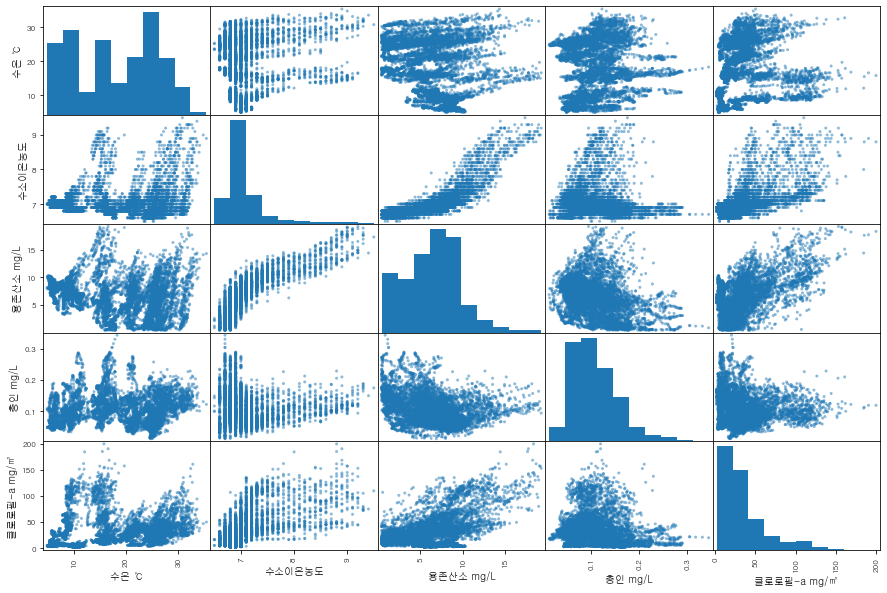

In [105]:
from pandas.plotting import scatter_matrix

attributes = ["수온 ℃",	"수소이온농도",	"용존산소 mg/L", "총인 mg/L", "클로로필-a mg/㎥"]
scatter_matrix(scb2015_wo_NA[attributes], figsize=(15, 10))
plt.show()